# Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which

# First dataset

In [ ]:
data=pd.read_csv('/content/dataset-tickets-multi-lang-4-20k.csv')
data.head()

ParserError: Error tokenizing data. C error: EOF inside string starting at row 9024

In [ ]:

data = data[data['language'] != 'de']
data.head()

,subject,body,answer,type,queue,priority,language,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
1,Customer Support Inquiry,Seeking information on digital strategies that...,We offer a variety of digital strategies and s...,Request,Customer Service,medium,en,Feedback,Sales,IT,Tech Support,NaN,NaN,NaN,NaN
2,Data Analytics for Investment,I am contacting you to request information on ...,I am here to assist you with data analytics to...,Request,Customer Service,medium,en,Technical,Product,Guidance,Documentation,Performance,Feature,NaN,NaN
4,Security,"Dear Customer Support, I am reaching out to in...","Dear [name], we take the security of medical d...",Request,Customer Service,medium,en,Security,Customer,Compliance,Breach,Documentation,Guidance,NaN,NaN
5,Concerns About Securing Medical Data on 2-in-1...,Inquiring about best practices for securing me...,Thank you for your concern regarding securing ...,Request,Technical Support,medium,en,Security,Product,Feature,IT,Tech Support,NaN,NaN,NaN
7,Problem with Integration,"The integration stopped working unexpectedly, ...",I will look into the problem and call you at <...,Problem,IT Support,high,en,Technical,Integration,Bug,Resolution,Outage,Documentation,NaN,NaN


In [ ]:
len(data)


11923

In [ ]:
data_selected = data[['body', 'type']]
data_selected.head()

,body,type
1,Seeking information on digital strategies that...,Request
2,I am contacting you to request information on ...,Request
4,"Dear Customer Support, I am reaching out to in...",Request
5,Inquiring about best practices for securing me...,Request
7,"The integration stopped working unexpectedly, ...",Problem


In [ ]:
data_selected.value_counts('type')

,count
type,
Incident,4642
Request,3498
Problem,2498
Change,1285


In [ ]:
data_selected.isnull().sum()

,0
body,1
type,0


In [ ]:


data_selected.dropna(inplace=True)
data_selected.isnull().sum()


<ipython-input-9-429e4fddb9d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected.dropna(inplace=True)


,0
body,0
type,0


In [ ]:
data_selected.duplicated().sum()

np.int64(0)

In [ ]:
data_selected['type'] = data_selected['type'].replace({
    'Change': 'Change/Request',
    'Request': 'Change/Request'
})
data_selected.value_counts('type')

data_selected['type'] = data_selected['type'].replace({
    'Incident': 'Incident/Problem',
    'Problem': 'Incident/Problem'
})

data_selected.value_counts('type')
data_selected['type'] = data_selected['type'].replace({
    'Incident/Problem': 'Problem',
    'Change/Request': 'Request'
})


<ipython-input-11-55fd4903c0c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['type'] = data_selected['type'].replace({
<ipython-input-11-55fd4903c0c6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['type'] = data_selected['type'].replace({
<ipython-input-11-55fd4903c0c6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [ ]:
data_selected.value_counts('type')

,count
type,
Problem,7139
Request,4783


In [ ]:
data_selected.head()

,body,type
1,Seeking information on digital strategies that...,Request
2,I am contacting you to request information on ...,Request
4,"Dear Customer Support, I am reaching out to in...",Request
5,Inquiring about best practices for securing me...,Request
7,"The integration stopped working unexpectedly, ...",Problem


In [ ]:
data_selected.to_csv('data_selected.csv', index=False)

# Second dataset

In [ ]:
from datasets import load_dataset

ds = load_dataset("gorkemsevinc/customer_support_tickets", split='train')
import pandas as pd
df = pd.DataFrame(ds)
df

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/499 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.12M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8469 [00:00<?, ? examples/s]

,Customer Email,Product Purchased,Ticket Type,Ticket Subject,Combined Text,Ticket Priority
0,carrollallison@example.com,gopro hero,technical issue,product setup,i'm having an issue with the gopro hero. pleas...,critical
1,clarkeashley@example.com,lg smart tv,technical issue,peripheral compatibility,i'm having an issue with the lg smart tv. plea...,critical
2,gonzalestracy@example.com,dell xps,technical issue,network problem,i'm facing a problem with my dell xps. the del...,low
3,bradleyolson@example.org,microsoft office,billing inquiry,account access,i'm having an issue with the microsoft office....,low
4,bradleymark@example.com,autodesk autocad,billing inquiry,data loss,i'm having an issue with the autodesk autocad....,low
...,...,...,...,...,...,...
8464,adam28@example.net,lg oled,product inquiry,installation support,my lg oled is making strange noises and not fu...,low
8465,russell68@example.com,bose soundlink speaker,technical issue,refund request,i'm having an issue with the bose soundlink sp...,critical
8466,ashley83@example.org,gopro action camera,technical issue,account access,i'm having an issue with the gopro action came...,high
8467,fpowell@example.org,playstation,product inquiry,payment issue,i'm having an issue with the playstation. plea...,medium


In [ ]:
df['Ticket Type']= df['Ticket Type'].replace({
    'refund request': 'Request',
    'technical issue': 'Problem',
    'cancellation request': 'Request',
    'product inquiry': 'Request',
    'billing inquiry': 'Request'
})
df.head()

,Customer Email,Product Purchased,Ticket Type,Ticket Subject,Combined Text,Ticket Priority
0,carrollallison@example.com,gopro hero,Problem,product setup,i'm having an issue with the gopro hero. pleas...,critical
1,clarkeashley@example.com,lg smart tv,Problem,peripheral compatibility,i'm having an issue with the lg smart tv. plea...,critical
2,gonzalestracy@example.com,dell xps,Problem,network problem,i'm facing a problem with my dell xps. the del...,low
3,bradleyolson@example.org,microsoft office,Request,account access,i'm having an issue with the microsoft office....,low
4,bradleymark@example.com,autodesk autocad,Request,data loss,i'm having an issue with the autodesk autocad....,low


In [ ]:

data_selected_second= df[['Combined Text', 'Ticket Type']]
data_selected_second.head()


,Combined Text,Ticket Type
0,i'm having an issue with the gopro hero. pleas...,Problem
1,i'm having an issue with the lg smart tv. plea...,Problem
2,i'm facing a problem with my dell xps. the del...,Problem
3,i'm having an issue with the microsoft office....,Request
4,i'm having an issue with the autodesk autocad....,Request


In [ ]:
data_selected_second.value_counts('Ticket Type')

,count
Ticket Type,
Request,6722
Problem,1747


In [ ]:
data1 = data_selected[['body', 'type']]
data2 = data_selected_second[['Combined Text', 'Ticket Type']]

# Rename columns to have uniform names for merging
data1 = data1.rename(columns={'body': 'Text', 'type': 'Category'})
data2 = data2.rename(columns={'Combined Text': 'Text', 'Ticket Type': 'Category'})

# Concatenate both datasets
final_combined_data = pd.concat([data1, data2], ignore_index=True)

# Display the first few rows
final_combined_data.head()

,Text,Category
0,Seeking information on digital strategies that...,Request
1,I am contacting you to request information on ...,Request
2,"Dear Customer Support, I am reaching out to in...",Request
3,Inquiring about best practices for securing me...,Request
4,"The integration stopped working unexpectedly, ...",Problem


In [ ]:
len(final_combined_data)

20391

In [ ]:
download_data = final_combined_data.to_csv('final_combined_data.csv', index=False)


# Text Preprocessing

In [ ]:
import re
import string
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np
import pandas as pd
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    tokens = text.split()  # Tokenization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatization
    return ' '.join(tokens)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def clean_text(text):
    text = text.lower()  # Make the text lowercase
    text = re.sub('\[.*\]','', text).strip() # Remove text in square brackets
    text = text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation
    text = re.sub('\S*\d\S*\s*','', text).strip()  # Remove words containing numbers
    return text.strip()

In [ ]:
final_combined_data['Text'] = final_combined_data['Text'].apply(clean_text)

In [ ]:
stopwords = nlp.Defaults.stop_words
def lemmatizer(text):
    doc = nlp(text)
    sent = [token.lemma_ for token in doc if not token.text in set(stopwords)]
    return ' '.join(sent)

In [ ]:
final_combined_data['Text'] = final_combined_data['Text'].apply(lambda x: lemmatizer(x))

In [ ]:

final_combined_data.head()

,Text,Category
0,seek information digital strategy aid brand gr...,Request
1,contact request information datum analytic too...,Request
2,dear customer support reach inquire security p...,Request
3,inquire good practice secure medical datum con...,Request
4,integration stop work unexpectedly cause synch...,Problem


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Feature extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=2, max_df=0.95, stop_words='english')
dtm= tfidf.fit_transform(final_combined_data['Text'])
dtm

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 498674 stored elements and shape (20391, 4180)>

In [ ]:
tfidf.get_feature_names_out()[:10]

array(['ab', 'ability', 'able', 'ableton', 'abnormal', 'abrupt',
       'abruptly', 'absence', 'absent', 'absolutely'], dtype=object)

In [ ]:
final_combined_data

,Text,Category
0,seek information digital strategy aid brand gr...,Request
1,contact request information datum analytic too...,Request
2,dear customer support reach inquire security p...,Request
3,inquire good practice secure medical datum con...,Request
4,integration stop work unexpectedly cause synch...,Problem
...,...,...
20386,lg ole strange noise function properly suspect...,Request
20387,m issue bose soundlink speaker assist \n\n\n ...,Problem
20388,m issue gopro action camera assist different b...,Problem
20389,m issue playstation assist think product categ...,Request


<Axes: xlabel='Category', ylabel='count'>

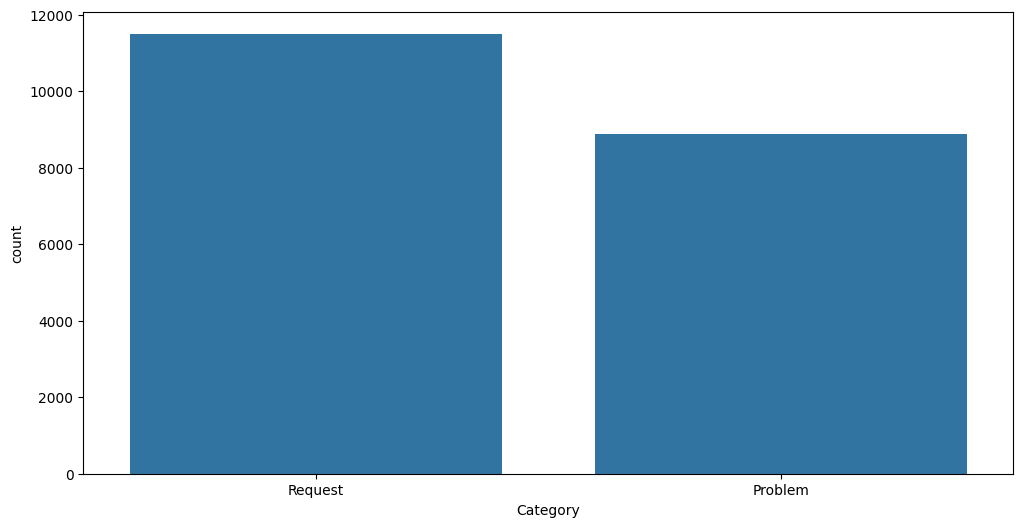

In [ ]:

plt.figure(figsize=(12,6))
sns.countplot(x='Category',data=final_combined_data)

In [ ]:
from collections import Counter

from imblearn.over_sampling import SMOTE

X = dtm
y = final_combined_data['Category']


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


print("Original dataset shape %s" % Counter(y))
print("Resampled dataset shape %s" % Counter(y_resampled))


Original dataset shape Counter({'Request': 11505, 'Problem': 8886})
Resampled dataset shape Counter({'Request': 11505, 'Problem': 11505})


In [ ]:
X_resampled.shape, y_resampled.shape

((23010, 4180), (23010,))

<Axes: xlabel='Category', ylabel='count'>

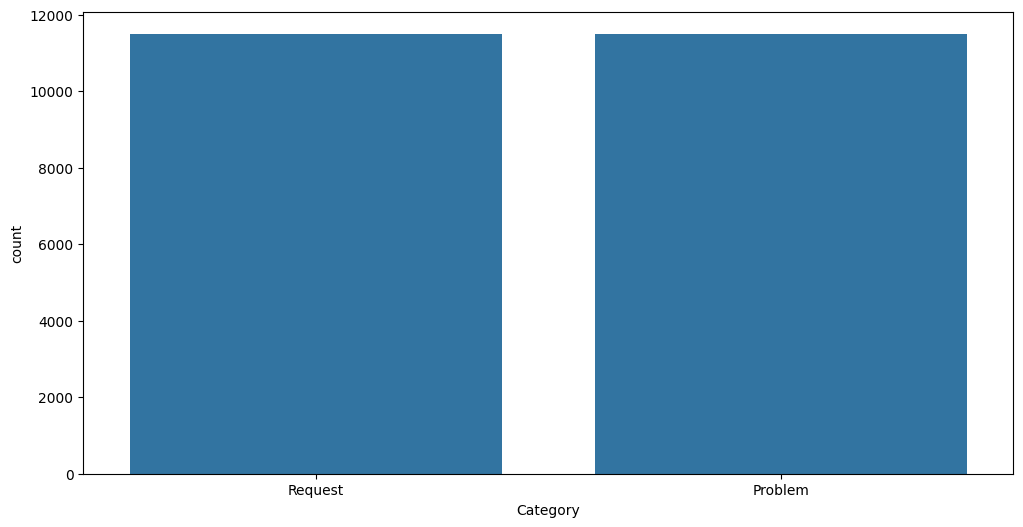

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x=y_resampled)

# Model Training

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
x=X_resampled
y=y_resampled
count_vec=CountVectorizer()

X_text = [tfidf.inverse_transform(row)[0] for row in x]

X_text = [' '.join(doc) for doc in X_text]
X_vect = count_vec.fit_transform(X_text)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_vect)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Classification models

# MultinomialNB

In [ ]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

clf = MultinomialNB()
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


              precision    recall  f1-score   support

     Problem       0.96      0.81      0.88      2278
     Request       0.84      0.97      0.90      2324

    accuracy                           0.89      4602
   macro avg       0.90      0.89      0.89      4602
weighted avg       0.90      0.89      0.89      4602

Accuracy: 0.8913515862668405


# XGBOOST Classifier

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      2278
           1       0.86      0.96      0.91      2324

    accuracy                           0.91      4602
   macro avg       0.91      0.90      0.90      4602
weighted avg       0.91      0.91      0.90      4602

Accuracy: 0.9050412863972186


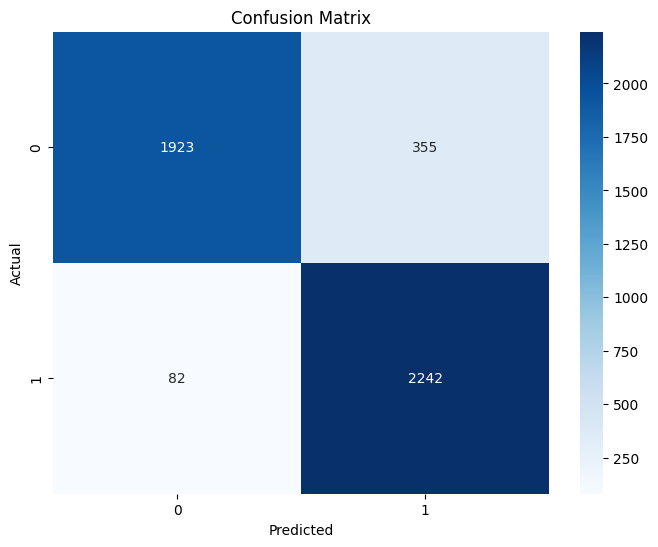

In [ ]:
!pip install xgboost
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

# ... (Your existing code) ...

# Assuming X_resampled and y_resampled are your features and labels
x = X_resampled
y = y_resampled

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_encoded = label_encoder.fit_transform(y)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y_encoded)), random_state=42)

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = xgb_classifier.predict(X_test)

# # Inverse transform predictions to original labels if needed
# y_pred_original = label_encoder.inverse_transform(y_pred)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test)) # You might want to use label_encoder.classes_ here for original labels
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# SVM Classifiers

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      2278
           1       0.87      1.00      0.93      2324

    accuracy                           0.92      4602
   macro avg       0.93      0.92      0.92      4602
weighted avg       0.93      0.92      0.92      4602

Accuracy: 0.9211212516297262


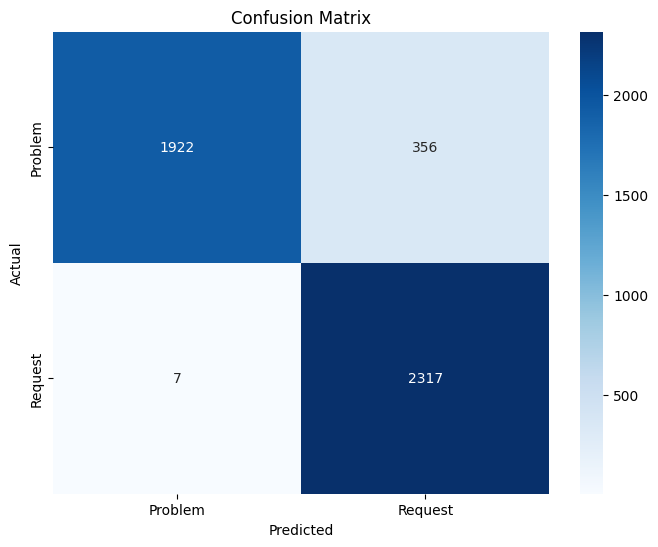

In [ ]:


from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Assuming X_resampled and y_resampled are your features and labels
x = X_resampled
y = y_resampled

# Initialize LabelEncoder (if not already initialized)
label_encoder = LabelEncoder()

# Fit and transform the target variable (if not already done)
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

# Initialize SVM classifier
svm_classifier = SVC(random_state=42)  # You can adjust parameters as needed

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# SKFold

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Assuming X_resampled and y_resampled are your features and labels
x = X_resampled
y = y_resampled

# Initialize LabelEncoder outside the loop
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Encode labels before the loop

# Initialize models
clf = MultinomialNB()
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y_encoded)), random_state=42)

models = [clf, xgb_classifier]
model_names = ['MultinomialNB', 'XGBoost']

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model, model_name in zip(models, model_names):
    print(f"Evaluating {model_name}:")
    accuracy_scores = []
    for fold, (train_index, test_index) in enumerate(skf.split(x, y_encoded)):  # Use y_encoded for splitting
        X_train, X_test = x[train_index], x[test_index]
        y_train, y_test = y_encoded[train_index], y_encoded[test_index]  # Use encoded labels

        # Fit the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)
        print(f"Fold {fold + 1}: Accuracy = {accuracy}")
        print(classification_report(y_test, y_pred))

    avg_accuracy = np.mean(accuracy_scores)
    print(f"Average Accuracy for {model_name}: {avg_accuracy}")
    print("-" * 30)

Evaluating MultinomialNB:
Fold 1: Accuracy = 0.8820078226857888
              precision    recall  f1-score   support

           0       0.97      0.79      0.87      2301
           1       0.82      0.97      0.89      2301

    accuracy                           0.88      4602
   macro avg       0.89      0.88      0.88      4602
weighted avg       0.89      0.88      0.88      4602

Fold 2: Accuracy = 0.8893959148196436
              precision    recall  f1-score   support

           0       0.98      0.80      0.88      2301
           1       0.83      0.98      0.90      2301

    accuracy                           0.89      4602
   macro avg       0.90      0.89      0.89      4602
weighted avg       0.90      0.89      0.89      4602

Fold 3: Accuracy = 0.8920034767492394
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      2301
           1       0.84      0.98      0.90      2301

    accuracy                           0.8

# Test predictions

In [ ]:


import pandas as pd

new_text = "I’ve been lockedAll my saved data appears to be wiped after the recent update, and I rely on this for daily work logs."
new_text = clean_text(new_text)
# new_text = lemmatizer(new_text)
# new_text = extract_pos_tags(new_text)

# Transform the new text using the fitted TF-IDF vectorizer
new_text_dtm = tfidf.transform([new_text])

# Use CountVectorizer and TF-IDF Transformer on the new text
new_text_vect = count_vec.transform([new_text])
new_text_tfidf = tfidf_transformer.transform(new_text_vect)

# Predict using the trained model (choose the model you want to use for prediction)

# Example with MultinomialNB:
predicted_category_nb = clf.predict(new_text_tfidf)[0]
predicted_category_nb = label_encoder.inverse_transform([predicted_category_nb])[0]
print(f"Predicted category (MultinomialNB): {predicted_category_nb}")

# Example with SVC
predicted_category_svm = svm_classifier.predict(new_text_dtm)[0]
predicted_category_svm = label_encoder.inverse_transform([predicted_category_svm])[0]
print(f"Predicted category (SVM): {predicted_category_svm}")

# Example with XGBoost
predicted_category_xgb = xgb_classifier.predict(new_text_dtm)[0]
# Convert back to the original label:
predicted_category_xgb = label_encoder.inverse_transform([predicted_category_xgb])[0]
print(f"Predicted category (XGBoost): {predicted_category_xgb}")


Predicted category (MultinomialNB): Problem
Predicted category (SVM): Problem
Predicted category (XGBoost): Problem


In [ ]:
import pandas as pd

# 🧪 20 Test messages and expected outputs
test_messages = [
    "Can someone help me set up my new account?",
    "I'm seeing an error message every time I try to log in.",
    "Is it possible to upgrade my plan to the premium tier?",
    "My order hasn’t arrived even though it’s marked as delivered.",
    "I’d like to request a change to my delivery address.",
    "The app keeps crashing after the recent update.",
    "Can I get a list of all previous invoices for this year?",
    "I was promised a discount but was charged the full amount.",
    "How do I reset my PIN for security reasons?",
    "The tracking number provided doesn’t work on your website.",
    "Please confirm if my subscription has been successfully canceled.",
    "The payment page is stuck and won’t let me proceed.",
    "Can I postpone my subscription renewal for one month?",
    "The system keeps logging me out after just a few minutes.",
    "I’d like to know the refund policy for canceled events.",
    "None of my messages are being delivered through the chat feature.",
    "Can I change the registered email on my account?",
    "The two-factor authentication code isn’t arriving.",
    "I’d like to request training on how to use the dashboard.",
    "My account was suspended without any notice."
]

expected_labels = [
    "Request", "Problem", "Request", "Problem", "Request",
    "Problem", "Request", "Problem", "Request", "Problem",
    "Request", "Problem", "Request", "Problem", "Request",
    "Problem", "Request", "Problem", "Request", "Problem"
]

# Store results
results = []

for i, msg in enumerate(test_messages):
    # Preprocess
    clean = clean_text(msg)
    # clean = lemmatizer(clean)        # Optional if you're using it
    # clean = extract_pos_tags(clean)  # Optional if you're using it

    # Transform for prediction
    dtm = tfidf.transform([clean])
    vect = count_vec.transform([clean])
    tfidf_input = tfidf_transformer.transform(vect)

    # Predict
    pred_nb = clf.predict(tfidf_input)[0]
    pred_svm = svm_classifier.predict(dtm)[0]
    pred_xgb = xgb_classifier.predict(dtm)[0]

    # Decode
    pred_nb = label_encoder.inverse_transform([pred_nb])[0]
    pred_svm = label_encoder.inverse_transform([pred_svm])[0]
    pred_xgb = label_encoder.inverse_transform([pred_xgb])[0]

    # Save
    results.append({
        "Message": msg,
        "Expected": expected_labels[i],
        "MultinomialNB": pred_nb,
        "SVM": pred_svm,
        "XGBoost": pred_xgb
    })

# Create DataFrame for output
df_results = pd.DataFrame(results)

# Show the result
print(df_results)
df_results.to_csv("model_comparison_results.csv", index=False)




                                              Message Expected MultinomialNB  \
0          Can someone help me set up my new account?  Request       Request   
1   I'm seeing an error message every time I try t...  Problem       Problem   
2   Is it possible to upgrade my plan to the premi...  Request       Request   
3   My order hasn’t arrived even though it’s marke...  Problem       Request   
4   I’d like to request a change to my delivery ad...  Request       Request   
5     The app keeps crashing after the recent update.  Problem       Problem   
6   Can I get a list of all previous invoices for ...  Request       Request   
7   I was promised a discount but was charged the ...  Problem       Request   
8         How do I reset my PIN for security reasons?  Request       Request   
9   The tracking number provided doesn’t work on y...  Problem       Request   
10  Please confirm if my subscription has been suc...  Request       Problem   
11  The payment page is stuck and won’t 

# With Auto response model

In [ ]:
import random
import string


# Function to generate a random ticket ID
def generate_ticket_id():
    ticket_id = ''.join(random.choices(string.digits, k=8))
    return ticket_id

# Function to generate auto-response based on the predicted class
def auto_response(text, user_name, ticket_subject, email):
    # Automatically generate ticket ID
    ticket_id = generate_ticket_id()

    # Predict the class of the ticket (e.g., "Request", "Problem", etc.)
    predicted_class = predict_text(text)
    response_templates = {
        "Problem": f"""
        Dear {user_name},

        We understand that you're facing an issue with '{ticket_subject}'.

        Your ticket ID is #{ticket_id}. Our support team is looking into your issue and will get back to you as soon as possible.

        Regards,
        Support Team
        """,
        "Request": f"""
        Dear {user_name},

        Thank you for submitting a request regarding '{ticket_subject}'.

        Your request has been received with Ticket ID #{ticket_id}. Our team is processing your request and will update you shortly.

        Regards,
        Support Team
        """
    }

    default_response = f"""
    Dear {user_name},

    We have received your inquiry regarding '{ticket_subject}'.

    Our team will review your message and get back to you shortly.

    Regards,
    Support Team
    """

    response_text = response_templates.get(predicted_class, default_response)

    return response_text


input_text = input("Input text description: ")
user_name = input("Enter user's name: ")
ticket_subject = input("Enter ticket subject: ")
email = input("Enter user's email: ")

print("\nAuto-Response:\n")
print(auto_response(input_text, user_name, ticket_subject, email))


Input text description:  Can you please help me reset my password?
Enter user's name:  Request a password
Enter ticket subject:  ashraqt
Enter user's email: 

Auto-Response:


        Dear  Request a password,

        We understand that you're facing an issue with ' ashraqt'.

        Your ticket ID is #77127454. Our support team is looking into your issue and will get back to you as soon as possible.

        Regards,
        Support Team
        
